In [1]:
#to enable plotting in jupyter notebook
%matplotlib inline

In [2]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
#for calculating accuracy measures and confusion matrix
from sklearn import metrics

In [4]:
#importing the file into the notebook
#as the file is just flat without headers, defining a headers variable and initaiting the values for headers
headers = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

pima_df = pd.read_csv("pima-indians-diabetes.data", names = headers)
pima_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


####Brief about the data
The research was done by some medical universities in United States where they are trying to study the Pima Indian Tribes in South America who apparently seem to have more cases of diabetes amongst women within certain age range. This research was restriceted to women with certain age and above. The objective is to find out whether a person at a very young age is likely to have diabetes later on, yes or no? If a person is likely to be diabetic later on may be an early intervention, what kind of prevent that person from getting into serious diabetes cases later on.  



####Brief about the columns
<p> preg -> how many times that person reported pregnancy </p> 
<p> plas -> plasma in blood </p>
<p> pres -> blood pressure </p>
<p> skin -> some kind of result done on the skin as apparently people with disbetes have some skin problems as well</p>
<p> test -> certain values for certain tests</p>
<p> mass -> body mass index</p>
<p> pedi -> result of some test </p>
<p> age -> age of the person</p>
<p> class -> if the person is diabetic or not. 1 for diabetic 0 for not</p>


In [5]:
#to check the non numeric rows
pima_df[~np.isreal(pima_df)]

,preg,plas,pres,skin,test,mass,pedi,age,class


In [6]:
#to check if there is any null or missing values
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
pima_df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [8]:
#to analyse the distribution of the various attributes
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#pivot table to see the distribution of data into classes
pima_df.groupby(['class']).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


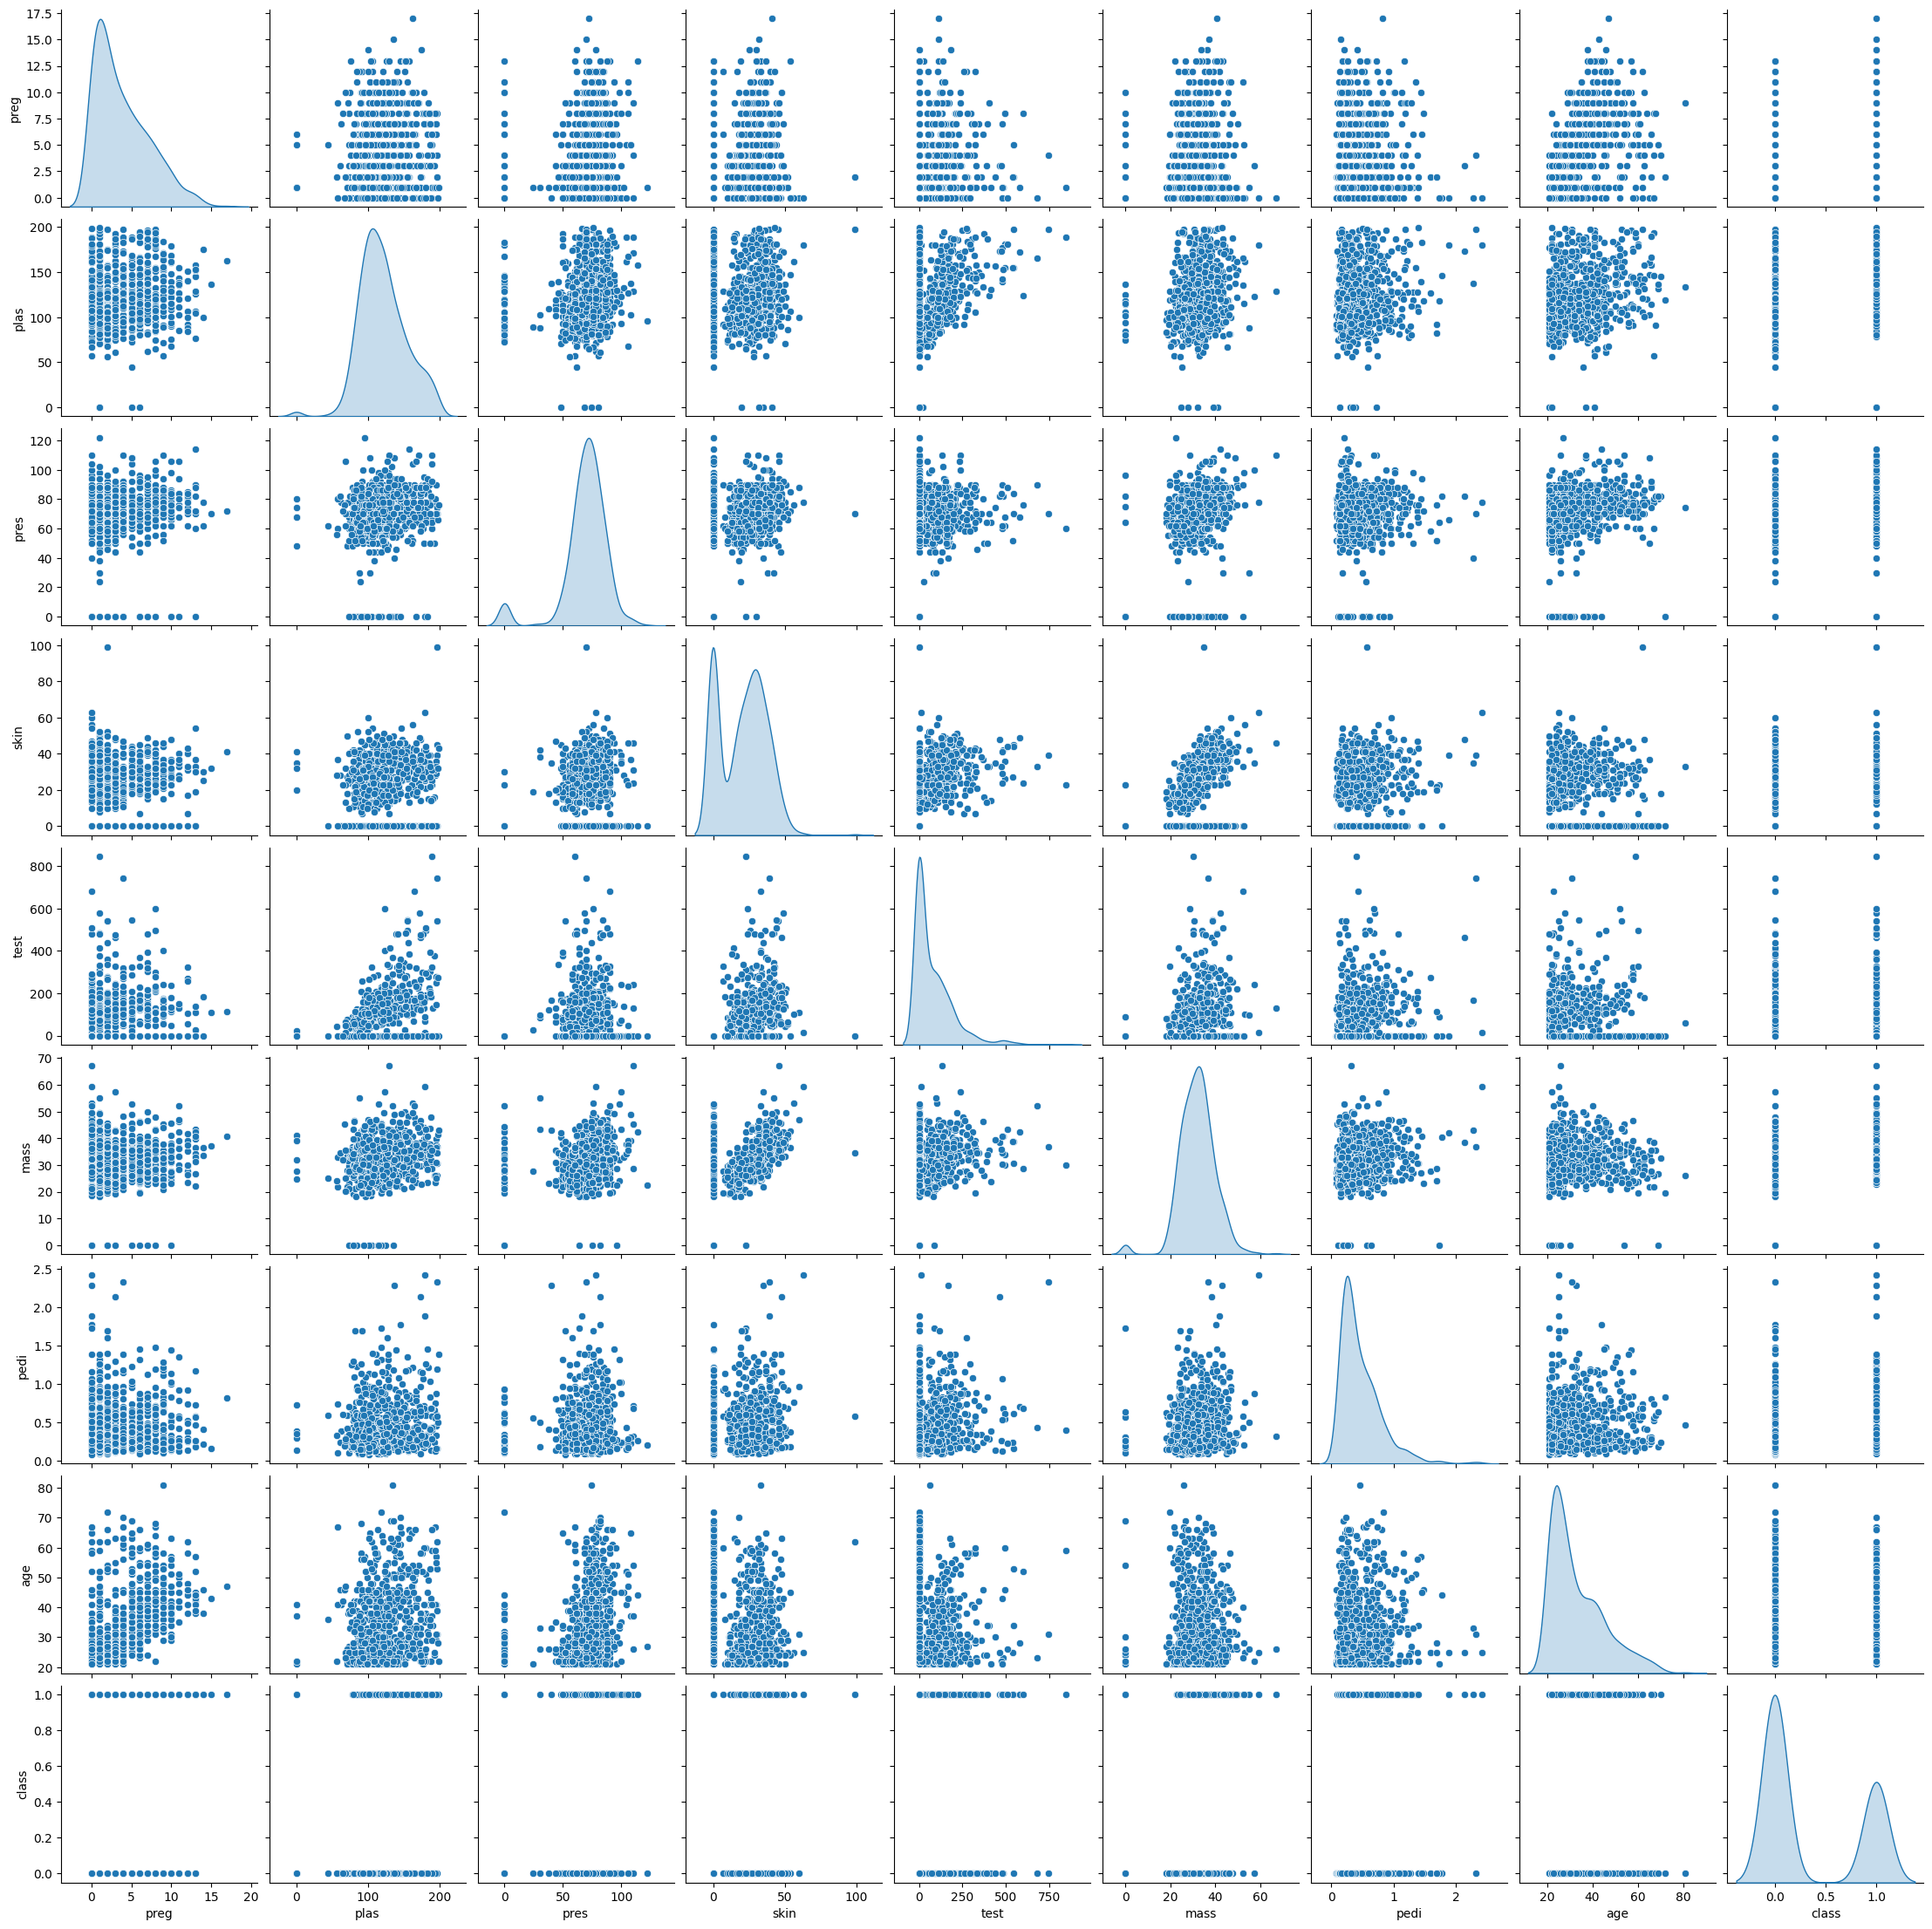

In [10]:
#as the data is not sufficient, up sampling can be done (more data to be collected). But we are moving on to see how well will be the model
#most are no diabetic. The ratio is almost 1:2 in favor or class 0. The model's ability to predict 0 will be better than that of 1.
sns.pairplot(pima_df, diag_kind = 'kde')

In [11]:
#as we are not building a linear model, scatter plots are not much analysed but still we can see most of the features are independent of others
#also the target column is not fully seperated among the attributes. 2 classes are oeverlapping significantly which indicates that the attribute is useless to seggregate the 2 classes
#so now if we built a model on this, each of this attribute individually is now a weak predictor of the classes, hopefully when we put together, overall model will be strong predictors

In [12]:
#seperating dependent and independent variables
X = pima_df.iloc[:,0:8]
y = pima_df.iloc[:,8]
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [14]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [15]:
X_train.head(),y_train.head()

(     preg  plas  pres  skin  test  mass   pedi  age
 88     15   136    70    32   110  37.1  0.153   43
 467     0    97    64    36   100  36.8  0.600   25
 550     1   116    70    28     0  27.4  0.204   21
 147     2   106    64    35   119  30.5  1.400   34
 481     0   123    88    37     0  35.2  0.197   29,
 88     1
 467    0
 550    0
 147    0
 481    0
 Name: class, dtype: int64)

In [16]:
X_test.head(),y_test.head()

(     preg  plas  pres  skin  test  mass   pedi  age
 285     7   136    74    26   135  26.0  0.647   51
 101     1   151    60     0     0  26.1  0.179   22
 581     6   109    60    27     0  25.0  0.206   27
 352     3    61    82    28     0  34.4  0.243   46
 726     1   116    78    29   180  36.1  0.496   25,
 285    0
 101    0
 581    0
 352    0
 726    0
 Name: class, dtype: int64)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

#To check the parameters
pd.DataFrame(model.coef_, columns = headers[0:8])

,preg,plas,pres,skin,test,mass,pedi,age
0,0.101432,0.033586,-0.015711,-0.001349,-0.000697,0.089437,0.560491,0.017057


In [18]:
#To check the intercepts
pd.DataFrame(model.intercept_, columns = [headers[-1]])

,class
0,-7.868285


In [19]:
#To check the model score
model.score(X_test, y_test)

0.7835497835497836

In [20]:
#To chcek the confusion matrix
y_pred = model.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[132,  14],
       [ 36,  49]])

In [21]:
# we should never depend on the overall score in cases where any one class is underrepresented
#so seeing recall and precision from the confusion matrix
metrics.f1_score(y_test, y_pred)

0.6621621621621621

In [22]:
#The f1 score is quite low. We will try to scale the features and then check the f1 score
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [23]:
model_s = LogisticRegression()
model_s.fit(X_train_scaled, y_train)
model_s.score(X_test_scaled, y_test)

0.7792207792207793

In [24]:
y_pred_s = model_s.predict(X_test_scaled)
metrics.f1_score(y_test, y_pred_s)

0.653061224489796

In [35]:
#using a different model to see if there is any imporvement in the f1score
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)
metrics.classification_report(y_test, model_nb.predict(X_test_scaled), output_dict = True)

{'0': {'precision': 0.8,
  'recall': 0.8767123287671232,
  'f1-score': 0.8366013071895425,
  'support': 146},
 '1': {'precision': 0.7464788732394366,
  'recall': 0.6235294117647059,
  'f1-score': 0.6794871794871796,
  'support': 85},
 'accuracy': 0.7835497835497836,
 'macro avg': {'precision': 0.7732394366197184,
  'recall': 0.7501208702659146,
  'f1-score': 0.7580442433383611,
  'support': 231},
 'weighted avg': {'precision': 0.7803060788976283,
  'recall': 0.7835497835497836,
  'f1-score': 0.7787887493769847,
  'support': 231}}

In [31]:
metrics.confusion_matrix(y_test, model_nb.predict(X_test_scaled))

array([[128,  18],
       [ 32,  53]])

In [ ]:
#we still see the f1 score low and one of the reasons for this is that our assumption that on various attributes the data is distributed in a normal sheet and there is no interaction between these attributes and from pair plot w see that some of the dimensions do interact with each other
#we can improve model's accuracy by having a validation data range for each column and treating the values those fall out of that data range as we are not sure about the acceptable data range for each colummn
#basic stats can be used then for outlier and missing value treatments
#Also data is not distributed equally among the different classes. Collection of more data especially about the diabetic patients helps to improve the model's accuracy
#Finally more relevant features can be brought which has some clear relationship with the target variable so to seggregate the data into no of required classes. atleast after putting everything together, on a whole it should be possible to seggregate the data into the number of classes we need